### Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación

### Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2021
Búsqueda y Recomendación para Textos Legales

Mentor: Jorge E. Pérez Villella

# Práctico Análisis y Visualización

Integrantes:

import os### Objetivos:

* Generar un corpus con todos los documentos. 

* Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

* Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras? 

* Hacer lo mismo con n-gramas.

* Visualizar la frecuencia de palabras en una nube de palabras.

* Elaborar una breve conclusión de lo encontrado

Fecha de Entrega: 6 de junio de 2021

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dirname="C:\\Users\\Usuario\\Mentoria Diplo\\Busqueda-y-Recomendacion-para-Textos-Legales-Mentoria2021\DOCUMENTOS"

In [3]:
def getListOfFiles(dirName, quantity=None):
    # create a list of file and sub directories 
    # names in the given directory
    files = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for file in files:
        # Create full path
        fullPath = dirName + "\\" + file
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath) and not quantity:
            allFiles = allFiles + getListOfFiles(fullPath)
        elif os.path.isdir(fullPath) and quantity:
            allFiles = allFiles + getListOfFiles(fullPath)[:quantity]
        else:
            allFiles.append(fullPath)
                
    return allFiles

Ejercicio 1

In [9]:
#Creamos el corpus
files_list=getListOfFiles(dirname)

corpus=[]
for file in files_list:
    f = open (file,'r', encoding="utf8")
    corpus.append(f.read())
corpus=','. join(corpus)

In [5]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#Podemos hacer una limpieza adicional a los tokens
def clean_stop_words(tokens):
    clean_tokens = tokens[:]
    sr = stopwords.words('spanish')
    
    for token in tokens:
        if token in sr:
            clean_tokens.remove(token)
    return clean_tokens

def obtain_tokens(documents):
    tokenizer = RegexpTokenizer(r'\w+') #Limpio los signos de puntuacion
    tokens=tokenizer.tokenize(documents)
    #tokens=clean_stop_words(tokens)
    freq = nltk.FreqDist(tokens)
    data = pd.DataFrame(freq.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
    return data

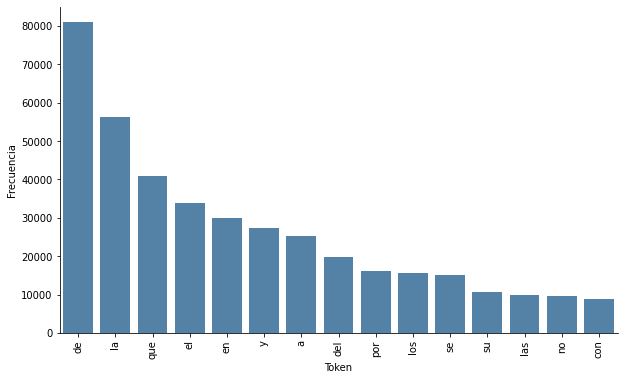

In [6]:
#Ejercicio 2
import nltk

data=obtain_tokens(corpus)
plt.figure(figsize=(10,6))
sns.barplot(x=data[:15].Token, y=data[:15].Frecuencia, color='steelblue')
plt.xticks(rotation=90)
sns.despine()


In [7]:
#Ejercicio 3

data[:10], data[-10:]

(    Token  Frecuencia
 9      de       80976
 62     la       56394
 55    que       41025
 90     el       33870
 78     en       29846
 36      y       27428
 47      a       25270
 32    del       19817
 130   por       16137
 54    los       15618,
                     Token  Frecuencia
 22343         presentaren           1
 22344         plantearnos           1
 22345  Excepcióndispuesto           1
 22346           ARCHÍVESE           1
 22347        Inviabilidad           1
 22348            disuelta           1
 22349            Asunción           1
 22354           fenecidos           1
 22355             precise           1
 34073                y551           1)

In [8]:
documents=[]
list_of_doc=getListOfFiles(dirname, 5)
len(list_of_doc)
for doc in list_of_doc:
    f = open (doc,'r', encoding="utf8")
    documents.append(f.read())
documents=','. join(documents)
data_documents=obtain_tokens(documents)
data_documents[:10],data_documents[-10:]


(    Token  Frecuencia
 9      de       10714
 62     la        7356
 55    que        5626
 90     el        4657
 78     en        4336
 36      y        3909
 47      a        3649
 32    del        2828
 164    se        2137
 54    los        2102,
              Token  Frecuencia
 7679   resguardada           1
 7677       subyace           1
 7675       GROSMAN           1
 7674        Propio           1
 7672     Culaciati           1
 7671         20012           1
 7670     SESSAREGO           1
 7669     FERNÁNDEZ           1
 7667   existencial           1
 13436    someterla           1)

In [19]:
#Ejercicio 4

#Se pueden hacer bigramas con NLTK

tokens = nltk.word_tokenize(documents)

#Create your bigrams
bgs = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)


data = pd.DataFrame(fdist.items(), columns=['bigrama', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
data

#Existe tambien la funcion de nltk para trigramas

,bigrama,Frecuencia
469,"(de, la)",2206
168,"(en, el)",803
409,"(a, la)",773
373,"(), .)",740
81,"(de, los)",622
...,...,...
30583,"(), Perspectiva)",1
30585,"(su, mirada)",1
30586,"(mirada, inexcusable)",1
30587,"(inexcusable, :)",1


Populating the interactive namespace from numpy and matplotlib


C:\Users\Usuario\Anaconda3\envs\mentoria_env\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(-0.5, 399.5, 199.5, -0.5)

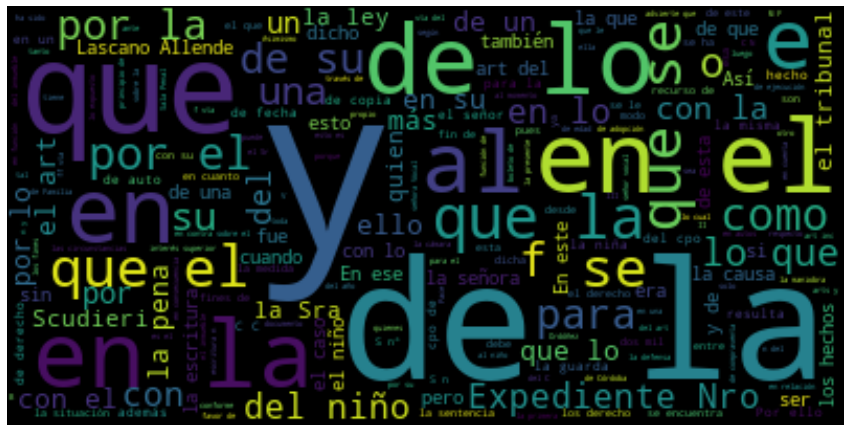

In [20]:
#Ejercicio 5
from wordcloud import WordCloud
wordcloud = WordCloud().generate(documents)

%pylab inline
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")